<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/all-models-roc-curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys

!{sys.executable} -m pip install -U xgboost==1.6.0 -q

     |████████████████████████████████| 193.7 MB 31 kB/s 


In [36]:
from google.colab import drive
import joblib
import os

import pandas as pd
import numpy as np

from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
# If downloading from GitHub, these paths will not work.
repo_path = '/content/drive/MyDrive/milestone-ii/'
test_path = ''.join([repo_path, 'Testing_set.csv'])

df_test = pd.read_csv(test_path, sep='\t', index_col='ix')
df_test['lemmatized_text'] = df_test['lemmatized_text'].fillna('')

df_test.head(2)

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,label
ix,,,,,,,,,,,
356588,She was born with the name Maria SkÅ odowska i...,she be bear with the name maria sk odowska in ...,7.174366,4.007143,3.57,5.11,2.86,1.43,4.88,12.0,0
304697,The highest wind gust reported in Guadeloupe w...,the high wind gust report in guadeloupe be 84 ...,6.333686,5.620000,3.69,8.66,2.94,1.43,3.93,14.0,0


In [75]:
model_dir = '/content/drive/MyDrive/milestone-ii/Models'
model_map = [
  ('decisontrees-clf.joblib', 'Decision Tree'),
  ('random-forest-clf.joblib', 'Random Forest'),
  ('xgboost-clf.joblib', 'XGBoost RF'),
  ('multinomialnaivebayes-clf.joblib', 'Naive Bayes'),
  ('logistic-regression-clf.joblib','Logistic Regression'),
  ('svc-model_final.joblib', 'Support Vector Machines (best)'),
]

[18:13:27] WARNING: ../src/gbm/gbtree.cc:390: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[18:13:27] WARNING: ../src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


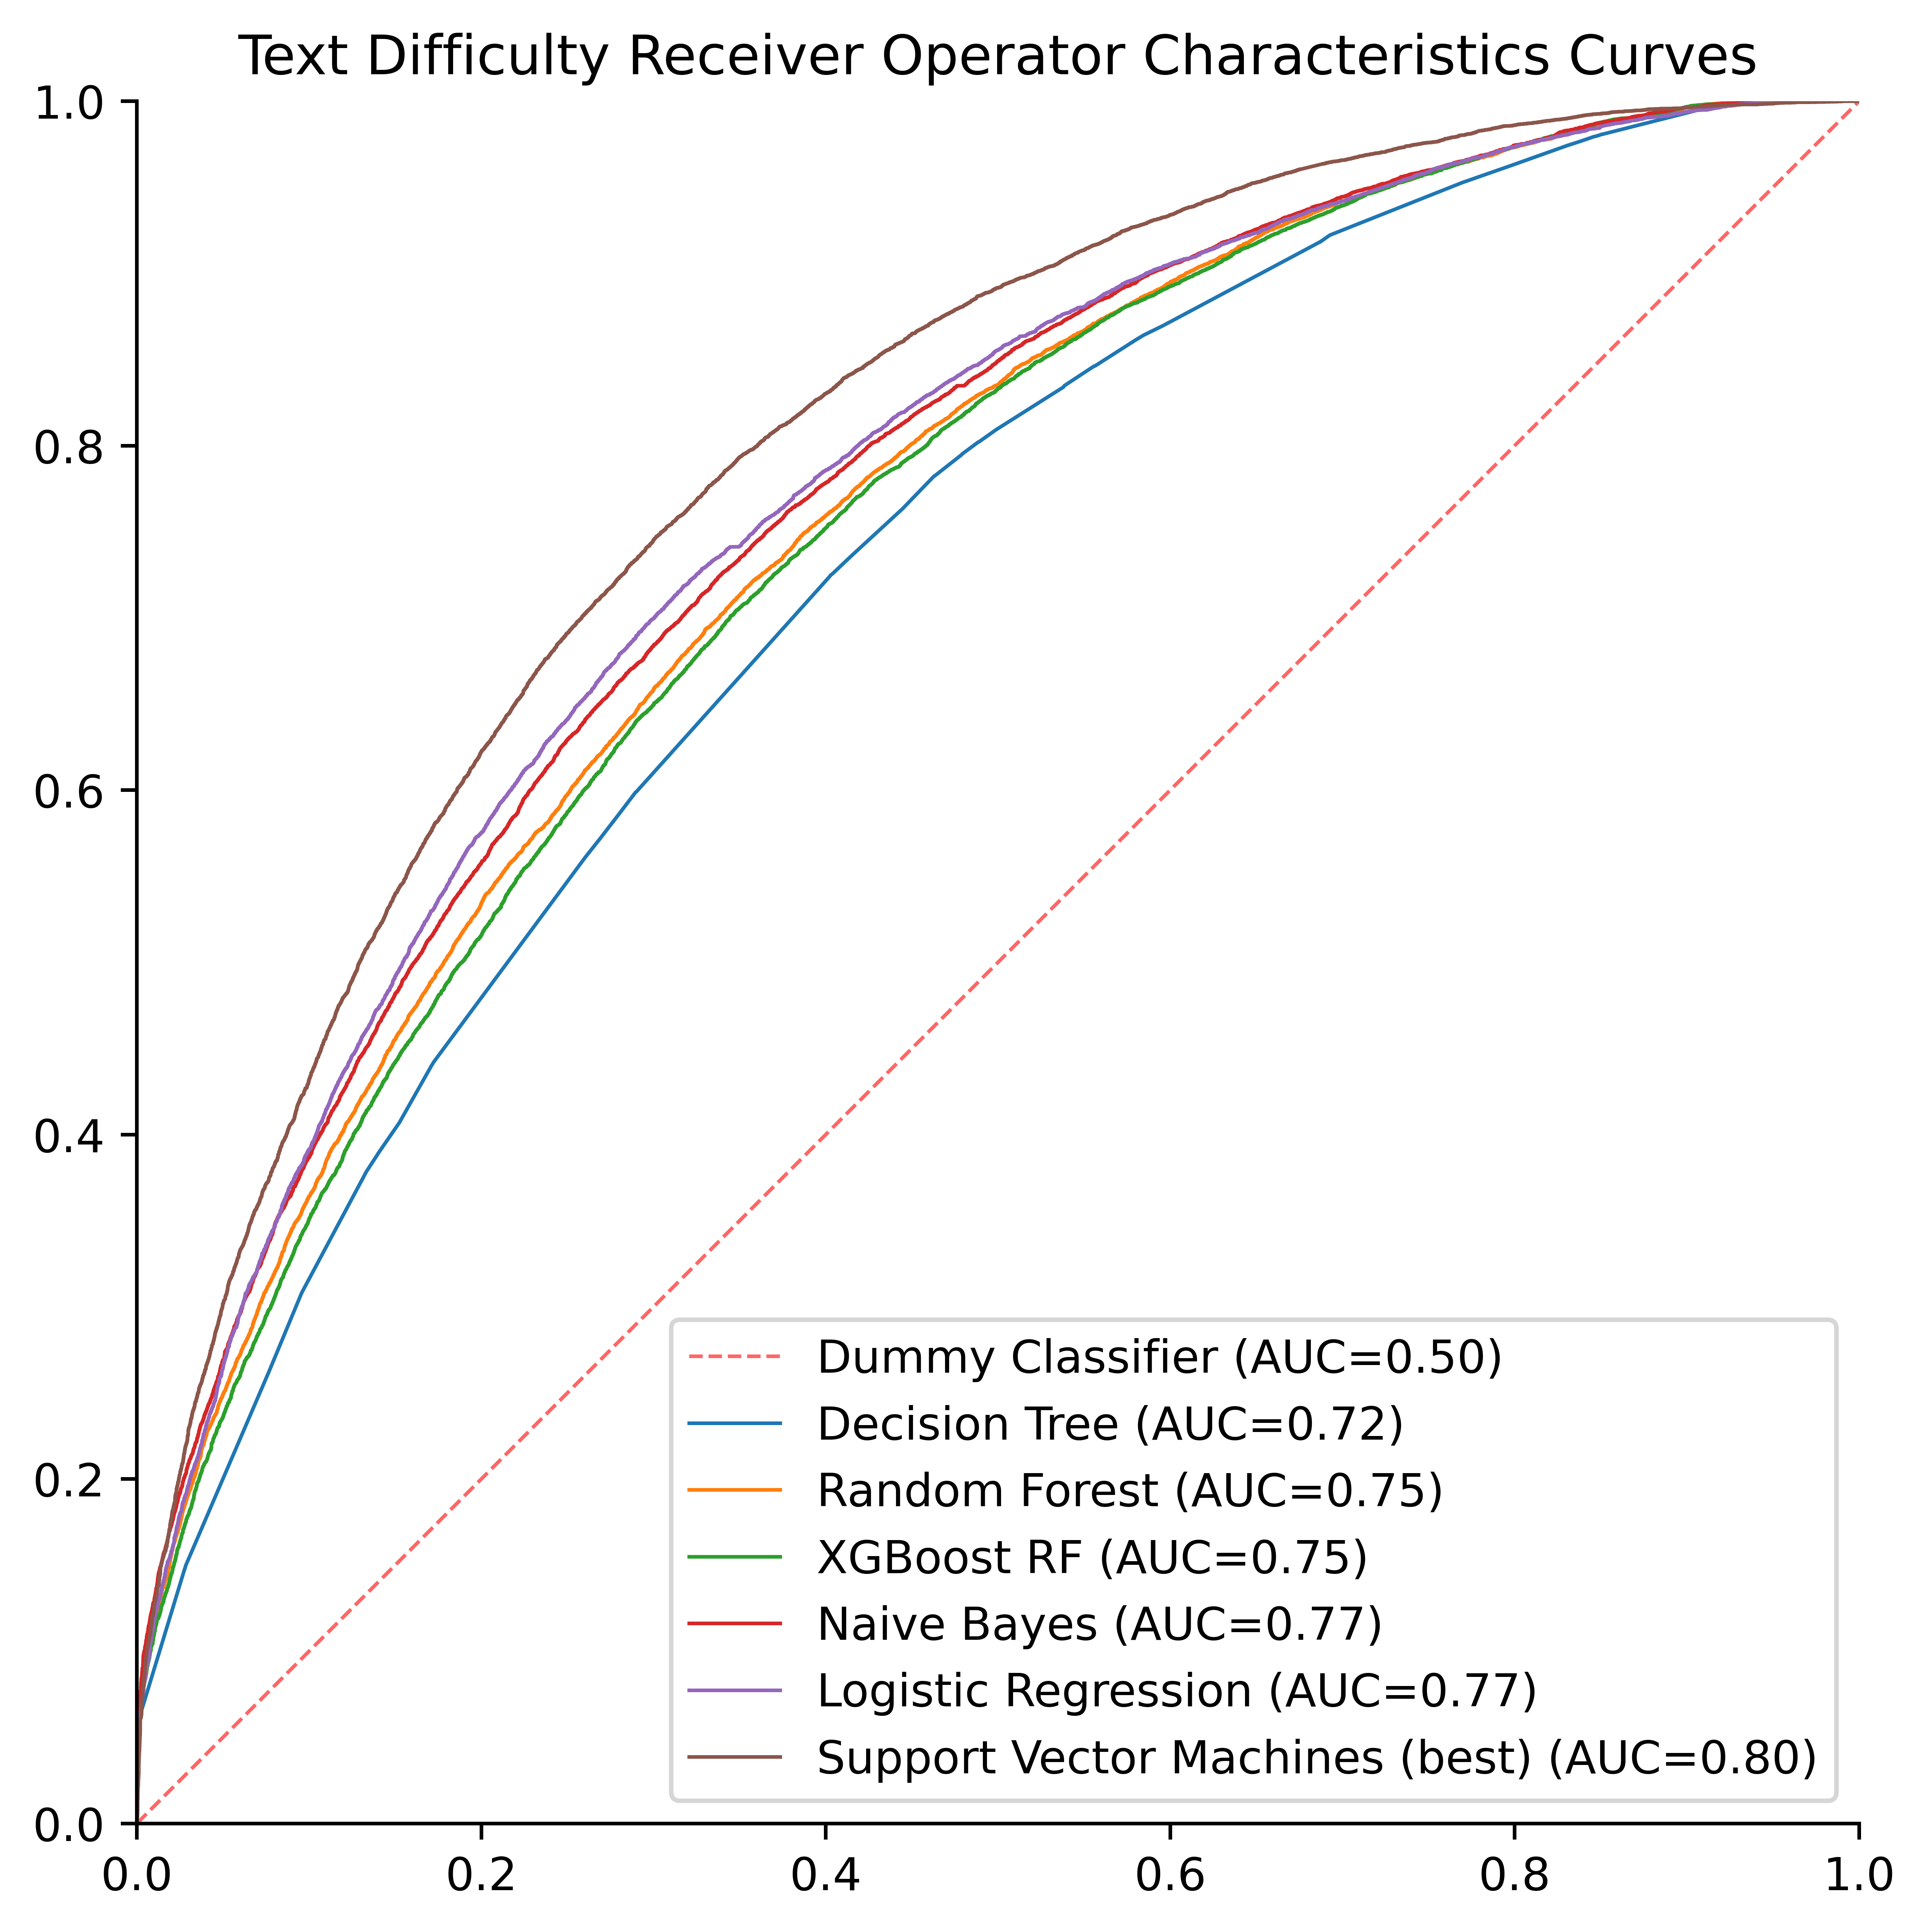

In [84]:
def plot_roc_auc_curves(model_dir, model_map, df_eval, save=True):
  fig = plt.figure(dpi=900, figsize=(8, 6))
  ax = plt.gca()
  ax.set_xlim(0, 1)
  ax.set_ylim(0, 1)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.set_title('Text Difficulty Receiver Operator Characteristics Curves')

  dummy_clf = np.linspace(0, 1, 100)
  ax.plot(dummy_clf, dummy_clf, 'r--', alpha=.6, linewidth=.8, label='Dummy Classifier (AUC=0.50)')
  
  for model_path, model_name in model_map:
    clf = joblib.load('/'.join([model_dir, model_path]))
    y_proba = clf.predict_proba(df_eval)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(df_eval.label, y_proba)
    roc_auc_score = metrics.roc_auc_score(df_eval.label, y_proba)

    ax.plot(fpr, tpr, linewidth=.8, label='{} (AUC={:.2f})'.format(model_name, roc_auc_score))

  ax.legend()
  ax.set_aspect('equal', adjustable='box')

  fig.tight_layout()
  fig.show()

  if save:
    plt.savefig(''.join([repo_path, 'roc-curves.png']), format='png', dpi=900)

plot_roc_auc_curves(model_dir, model_map, df_test, save=True)